# Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow import keras
import matplotlib.pyplot as plt

# 1. Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# 2. Exploratory Analysis

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

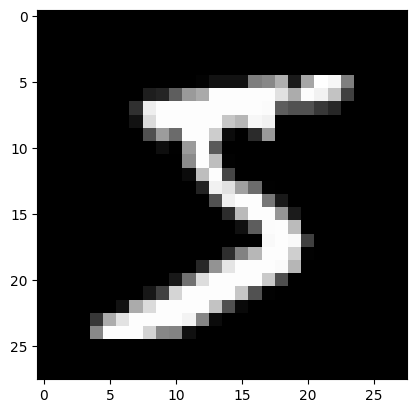

In [5]:
# 5
plt.imshow(x_train[0], cmap='gray')
plt.show()

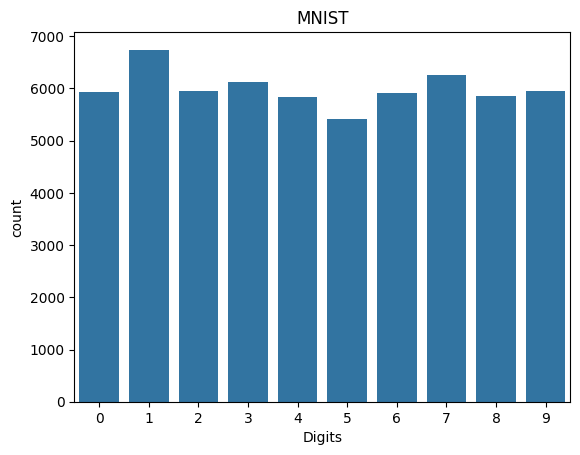

In [6]:
sns.countplot(x = y_train);
plt.xlabel('Digits')
plt.title('MNIST');

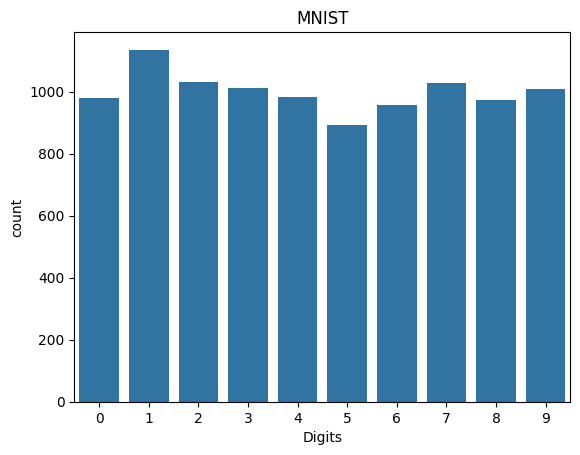

In [7]:
sns.countplot(x = y_test);
plt.xlabel('Digits')
plt.title('MNIST');

# 3. Multilayer Perceptron (MLP)

In [8]:
# Preprocessing
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [9]:
# Model

input_shape = x_train.shape[1:]

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = input_shape),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model.compile(optimizer = 'Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

results = model.fit(x_train,
                    y_train,
                    batch_size = 32,
                    epochs = 50,
                    validation_data = (x_test, y_test),
                    callbacks = [callback])

Epoch 1/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2538 - accuracy: 0.9271 - val_loss: 0.1425 - val_accuracy: 0.9583
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1133 - accuracy: 0.9660 - val_loss: 0.1116 - val_accuracy: 0.9654
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0791 - accuracy: 0.9763 - val_loss: 0.0959 - val_accuracy: 0.9697
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0597 - accuracy: 0.9815 - val_loss: 0.0852 - val_accuracy: 0.9727
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0456 - accuracy: 0.9858 - val_loss: 0.0750 - val_accuracy: 0.9751
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0366 - accuracy: 0.9883 - val_loss: 0.0783 - val_accuracy: 0.9767
Epoch 7/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0286 - accuracy: 0.9913 - val_loss: 0.0693 - val_accuracy:

# 4. Results

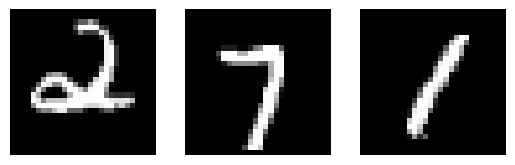

In [11]:
num_examples = 3
random_indices = np.random.choice(len(x_test), num_examples)

fig, ax = plt.subplots(1, 3)

for i, index in enumerate(random_indices):
    ax[i].imshow(x_test[index], cmap = 'gray')
    ax[i].axis('off')

In [12]:
from keras import backend as K

input_tensor = model.input

layer_outputs = [layer.output for layer in model.layers]

fetch_functions = [K.function([input_tensor], [output]) for output in layer_outputs]

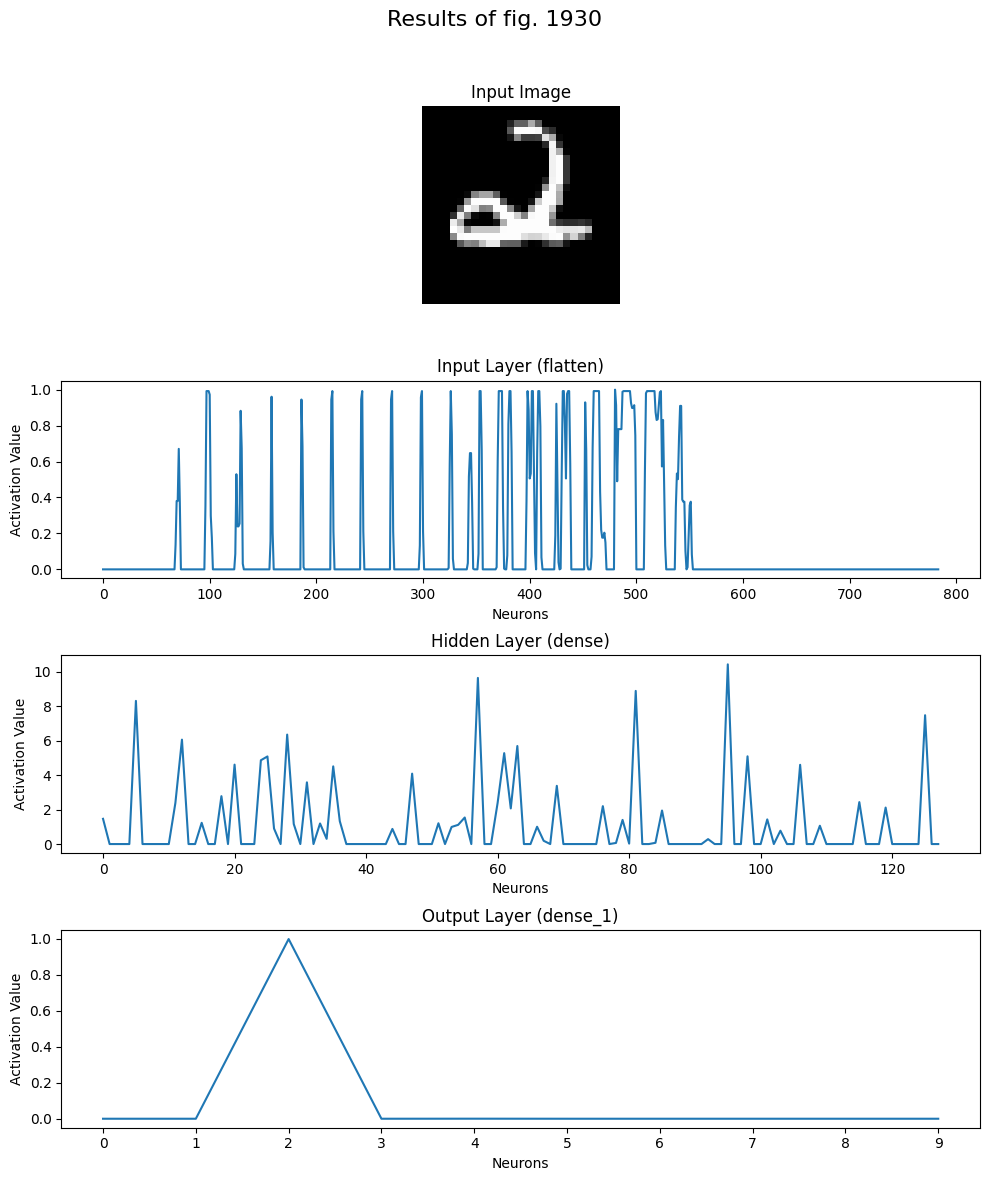

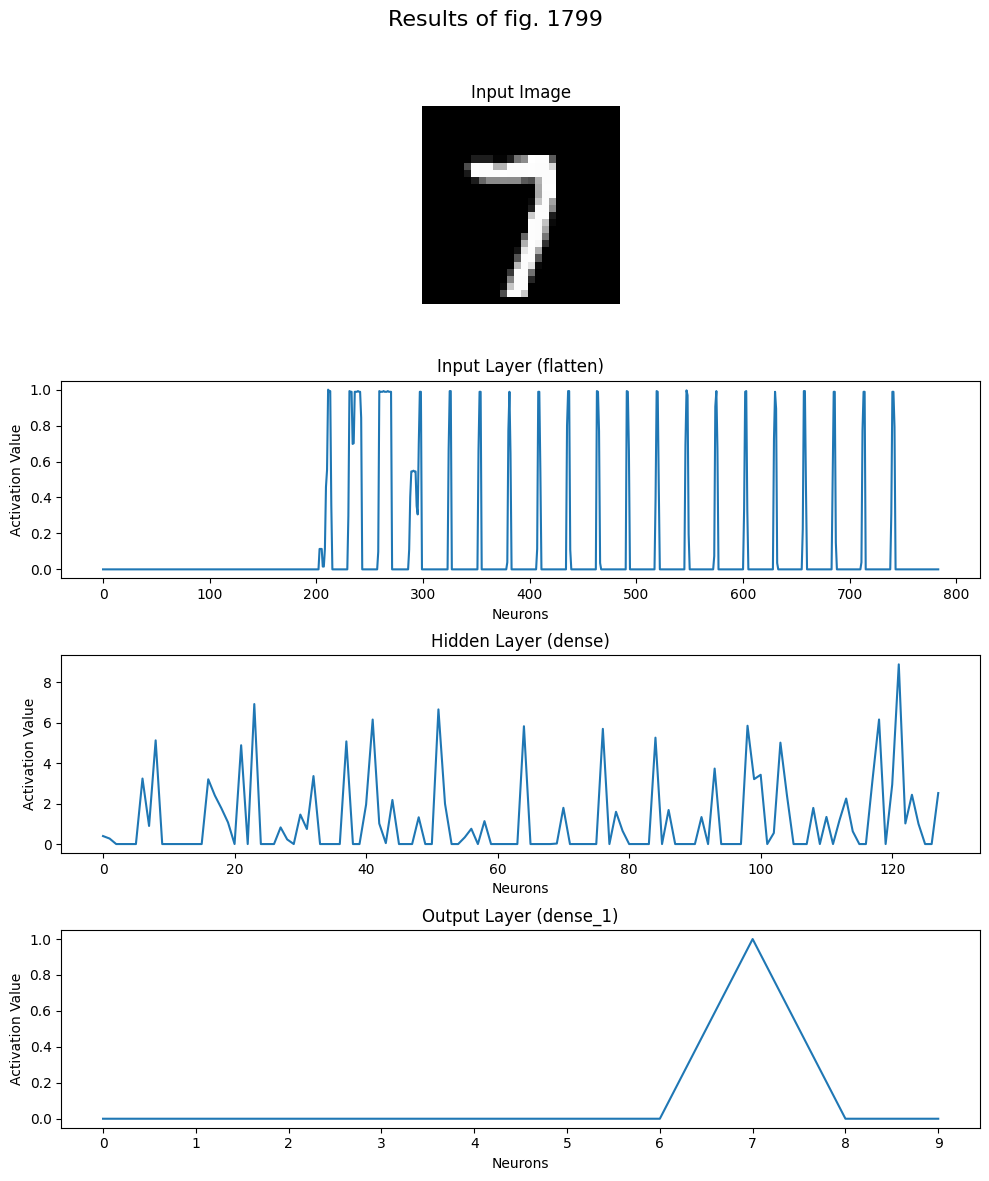

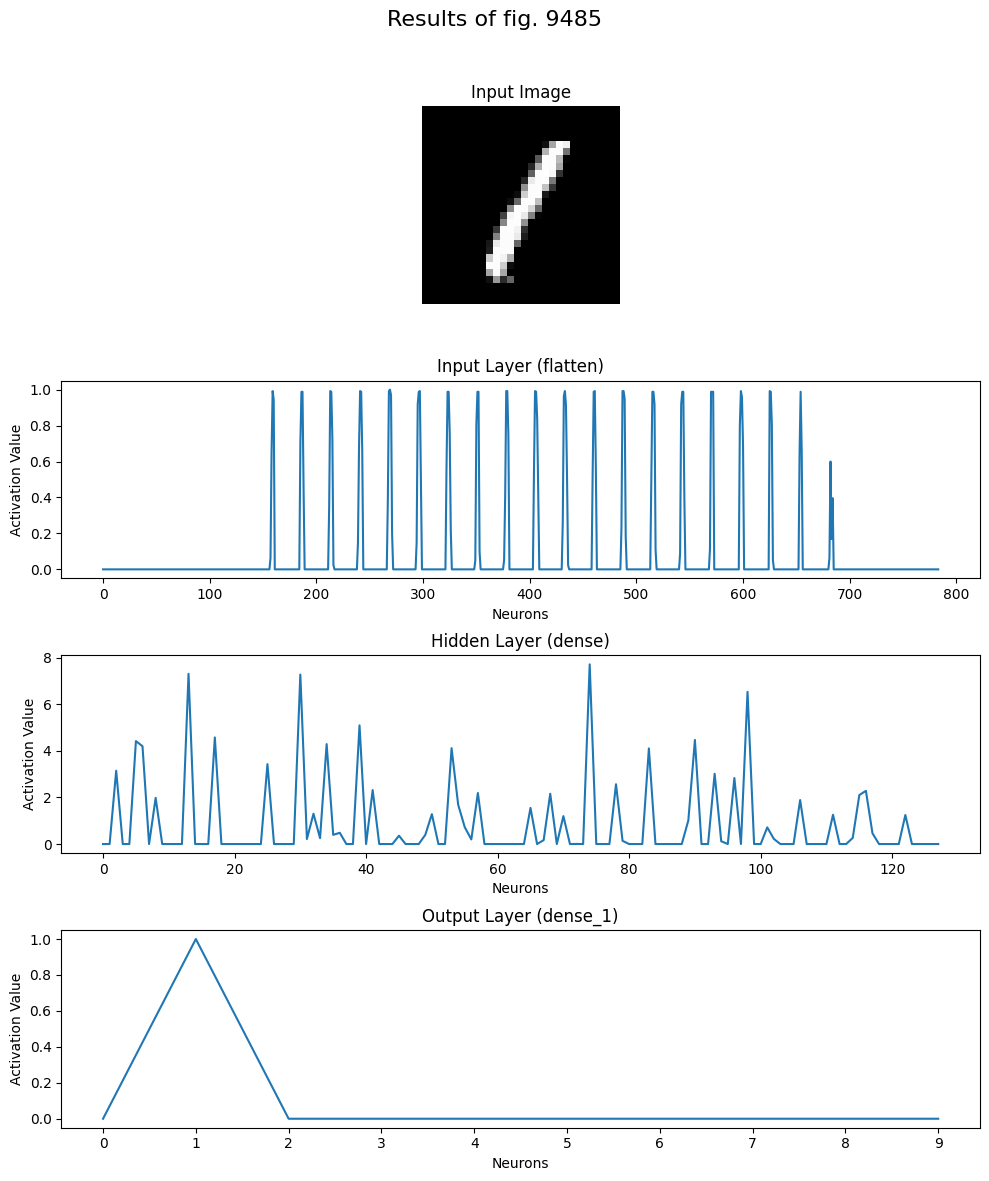

In [13]:
layers_names = ['Input Layer', 'Hidden Layer', 'Output Layer']

for idx in random_indices:
    input_data = x_test[idx]
    input_data = np.expand_dims(input_data, axis=0)

    # Returns the output of each layer to the input data
    layer_outputs_values = [func([input_data]) for func in fetch_functions]

    fig, axes = plt.subplots(len(layer_outputs_values) + 1, 1, figsize=(10, 12))
    fig.suptitle('Results of fig. {}'.format(idx), fontsize=16)

    axes[0].imshow(x_test[idx], cmap='gray')
    axes[0].set_title('Input Image')
    axes[0].axis('off')

    for i, (ax, layer_output) in enumerate(zip(axes[1:], layer_outputs_values)):
        output = layer_output[0]

        if len(output.shape) == 2:
            ax.plot(output[0])
            ax.set_title('{} ({})'.format(layers_names[i], model.layers[i].name))
            ax.set_xlabel('Neurons')
            ax.set_ylabel('Activation Value')

            if i == 2:
                ax.set_xticks(np.arange(0, 10))

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()